In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/rpdr_dataset_with_15.csv")
data.head()

,name,season,age,body_type,race_ethnicity,num_bottom,bottom_win,max_challenge,snatch_win,mini_challenge,drag_exp,challenge_type,personality,mentor_supp,judge_comment,lipsync_ass,sentiment,positive_action1,positive_action2,final_status
0,BeBe Zahara Benet,1,28,Slender,Black,1,1,2,No,0,8.0,"Runway, Performance",Elegant,No,Praised for elegance and strong performances,No,0.433333,elegance,strong performances,Winner
1,Nina Flowers,1,34,Athletic,Latinx,0,0,2,No,1,10.0,"Runway, Fashion",Confident,No,Celebrated for fashion and strong runway looks,No,0.391667,fashion,strong runway looks,Finalist
2,Rebecca Glasscock,1,26,Slender,Latinx,2,2,2,No,1,5.0,"Runway, Performance",Sweet,No,Praised for sweet personality and strong runwa...,Yes,0.391667,sweet personality,strong runway looks,Not in Finals
3,Shannel,1,29,Slender,White,2,1,0,No,0,6.0,"Runway, Performance",Polished,No,Known for polished looks and strong performances,Yes,0.433333,polished looks,strong performances,Not in Finals
4,Ongina,1,26,Slender,Asian American,1,0,2,No,0,5.0,"Runway, Fashion",Confident,No,Celebrated for fashion and strong runway looks,No,0.391667,fashion,strong runway looks,Not in Finals


In [ ]:
features_to_drop = [
    "season",
    "challenge_type",
    "body_type",
    "mentor_supp",
    "positive_action1",
    "positive_action2",
    "sentiment"
]

data = data.drop(columns=features_to_drop)

data['personality'] = data['personality'].apply(lambda x: 'Energetic' if x=="Energetic" else "Non-energetic")

In [ ]:
data[data["snatch_win"]=="Yes"]

,name,age,race_ethnicity,num_bottom,bottom_win,max_challenge,snatch_win,mini_challenge,drag_exp,personality,judge_comment,lipsync_ass,final_status
12,Tatianna,20,Latinx,2,1,2,Yes,1,3.0,Non-energetic,Praised for sweet personality and strong runwa...,Yes,Not in Finals
27,Stacy Layne Matthews,25,Black,2,1,1,Yes,0,8.0,Non-energetic,Highlighted for sweet personality and strong r...,No,Not in Finals
34,Chad Michaels,40,White,1,1,3,Yes,2,20.0,Non-energetic,Celebrated for polished looks and performances,No,Finalist
46,Jinkx Monsoon,24,White,1,1,2,Yes,0,7.0,Non-energetic,Praised for humor and performances,No,Winner
62,BenDeLaCreme,31,White,2,1,4,Yes,2,7.0,Non-energetic,Praised for humor and creativity,No,Not in Finals
73,Ginger Minj,29,White,1,1,4,Yes,2,10.0,Non-energetic,Celebrated for humor and performances,No,Finalist
75,Kennedy Davenport,33,Black,2,2,2,Yes,1,10.0,Energetic,Recognized for dance skills and high-energy pe...,Yes,Not in Finals
85,Bob the Drag Queen,29,Black,1,1,3,Yes,1,8.0,Non-energetic,Praised for humor and performances,No,Winner
101,Alexis Michelle,32,White,2,1,2,Yes,1,10.0,Non-energetic,Appreciated for humor and versatility,No,Not in Finals
112,Aquaria,21,White,0,0,5,Yes,2,5.0,Non-energetic,Praised for fashion and runway looks,No,Winner


In [ ]:
# Data Cleaning

# Check for missing values
missing_values = data.isnull().sum()

# Display missing values
missing_values


name              0
age               0
race_ethnicity    1
num_bottom        0
bottom_win        0
max_challenge     0
snatch_win        0
mini_challenge    0
drag_exp          1
personality       0
judge_comment     5
lipsync_ass       6
final_status      0
dtype: int64

In [ ]:
# Impute missing values for numerical columns with the mean
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    data[col].fillna(data[col].mean(), inplace=True)

# Impute missing values for categorical columns with the mode
cat_cols = data.select_dtypes(include=['object']).columns
for col in cat_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Check if there are any remaining missing values
missing_values_after_imputation = data.isnull().sum()

# Display missing values after imputation
missing_values_after_imputation


name              0
age               0
race_ethnicity    0
num_bottom        0
bottom_win        0
max_challenge     0
snatch_win        0
mini_challenge    0
drag_exp          0
personality       0
judge_comment     0
lipsync_ass       0
final_status      0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive Statistics
desc_stats = data.describe(include='all')

# Display descriptive statistics
desc_stats


,name,age,race_ethnicity,num_bottom,bottom_win,max_challenge,snatch_win,mini_challenge,drag_exp,personality,judge_comment,lipsync_ass,final_status
count,192,192.000000,192,192.000000,192.000000,192.000000,192,192.000000,192.000000,192,192,192,192
unique,189,NaN,9,NaN,NaN,NaN,2,NaN,NaN,2,128,2,3
top,Eureka,NaN,White,NaN,NaN,NaN,No,NaN,NaN,Non-energetic,Praised for fashion and runway looks,No,Not in Finals
freq,4,NaN,87,NaN,NaN,NaN,177,NaN,NaN,173,14,137,142
mean,NaN,28.625000,NaN,1.505208,0.760417,1.229167,NaN,0.484375,7.481675,NaN,NaN,NaN,NaN
std,NaN,5.373485,NaN,0.926613,0.871237,1.428793,NaN,0.772407,4.399956,NaN,NaN,NaN,NaN
min,NaN,20.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,2.000000,NaN,NaN,NaN,NaN
25%,NaN,25.000000,NaN,1.000000,0.000000,0.000000,NaN,0.000000,5.000000,NaN,NaN,NaN,NaN
50%,NaN,28.000000,NaN,1.000000,1.000000,1.000000,NaN,0.000000,6.000000,NaN,NaN,NaN,NaN
75%,NaN,31.000000,NaN,2.000000,1.000000,2.000000,NaN,1.000000,8.000000,NaN,NaN,NaN,NaN


Descriptive Statistics Summary
The data consists of 178 observations with various features, including age, body type, race/ethnicity, and performance-related metrics. Here are some key points:

Age: Mean age is 29.26 years, with a range from 21 to 52 years.
Body Type: Most queens are categorized as "Slender".
Race/Ethnicity: Majority of the queens are White.
Challenges: Various metrics such as num_bottom, bottom_win, max_challenge, etc., provide insight into the queens' performance.
Personality Types: Includes diverse categories like "Creative", "Versatile", etc.
Final Status: Categories include "Winner", "Finalist", etc.

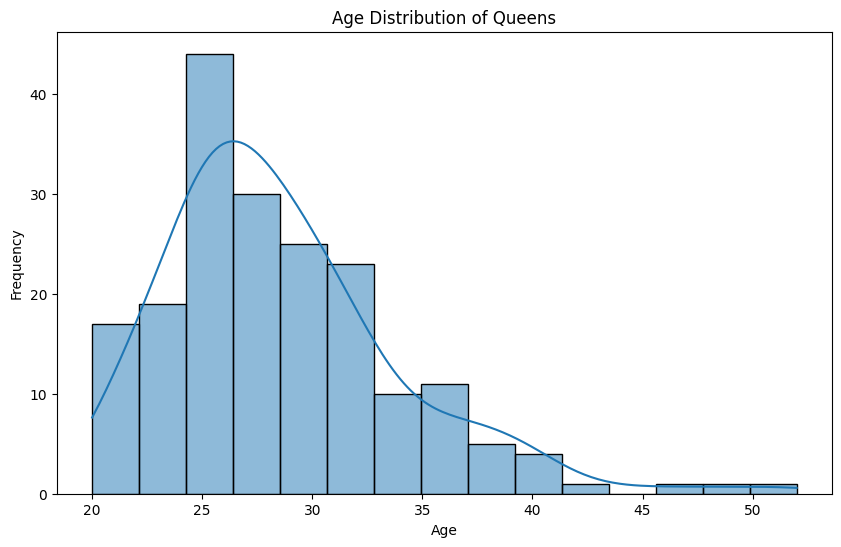

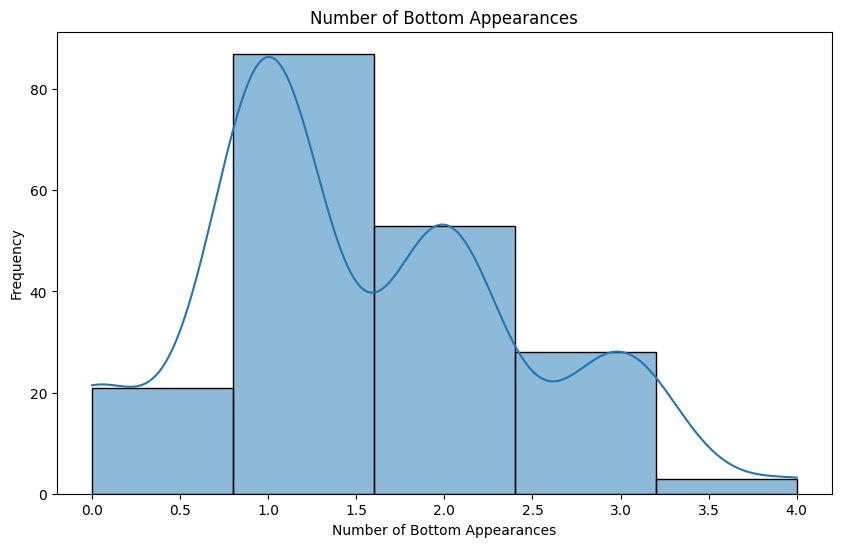

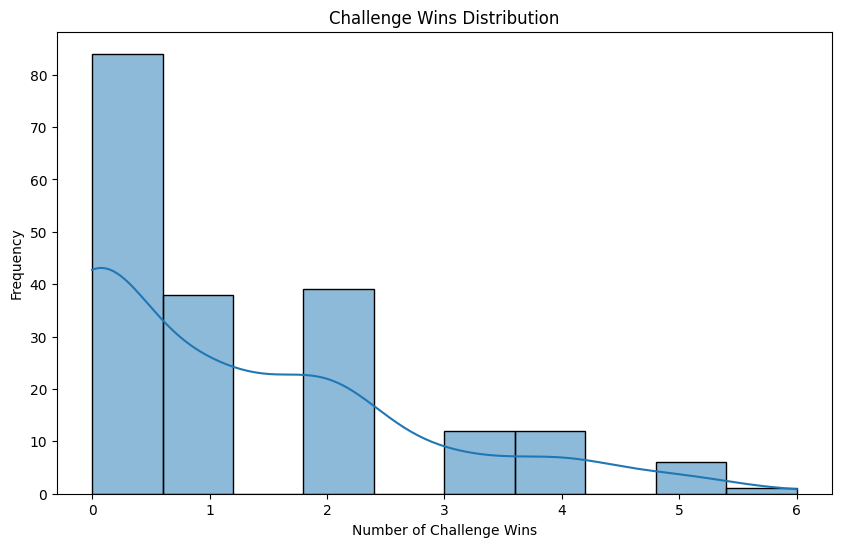

In [ ]:
# Plotting Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=15, kde=True)
plt.title('Age Distribution of Queens')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plotting Number of Bottom Appearances
plt.figure(figsize=(10, 6))
sns.histplot(data['num_bottom'], bins=5, kde=True)
plt.title('Number of Bottom Appearances')
plt.xlabel('Number of Bottom Appearances')
plt.ylabel('Frequency')
plt.show()

# Plotting Challenge Wins Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['max_challenge'], bins=10, kde=True)
plt.title('Challenge Wins Distribution')
plt.xlabel('Number of Challenge Wins')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# plt.figure(figsize=(14, 10))
# correlation_matrix = numeric_data.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Matrix of Numerical Features')
# plt.show()


Visualizations Interpretation
Correlation Matrix:

num_bottom and bottom_win have a strong positive correlation.
max_challenge and mini_challenge are moderately correlated.
sentiment is negatively correlated with num_bottom.
Distribution of Final Status:

Majority of the queens fall under "Not in finals".
Fewer queens are "Winners", "Finalists", or "Semi-finalists".

In [ ]:
data.head()

,name,age,race_ethnicity,num_bottom,bottom_win,max_challenge,snatch_win,mini_challenge,drag_exp,personality,judge_comment,lipsync_ass,final_status
0,BeBe Zahara Benet,28,Black,1,1,2,No,0,8.0,Non-energetic,Praised for elegance and strong performances,No,Winner
1,Nina Flowers,34,Latinx,0,0,2,No,1,10.0,Non-energetic,Celebrated for fashion and strong runway looks,No,Finalist
2,Rebecca Glasscock,26,Latinx,2,2,2,No,1,5.0,Non-energetic,Praised for sweet personality and strong runwa...,Yes,Not in Finals
3,Shannel,29,White,2,1,0,No,0,6.0,Non-energetic,Known for polished looks and strong performances,Yes,Not in Finals
4,Ongina,26,Asian American,1,0,2,No,0,5.0,Non-energetic,Celebrated for fashion and strong runway looks,No,Not in Finals


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from textblob import TextBlob

# Performance Ratios
data['challenge_win_ratio'] = data['max_challenge'] / (data['max_challenge'] + data['num_bottom'])
data['bottom_ratio'] = data['num_bottom'] / (data['max_challenge'] + data['num_bottom'])

# Experience per Year
data['experience_per_year'] = data['drag_exp'] / data['age']

# Age Group
bins = [20, 25, 30, 35, 40, 50, 60]
labels = ['20-25', '25-30', '30-35', '35-40', '40-50', '50+']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

# # Total Positive Actions
# data['total_positive_actions'] = data['positive_action1'] + ', ' + data['positive_action2']
# data['total_positive_actions'] = data['total_positive_actions'].apply(lambda x: len(x.split(', ')))

# Judge Comment Sentiment
data['judge_comment_sentiment'] = data['judge_comment'].apply(lambda x: TextBlob(x).sentiment.polarity)

# data['mentor_supp'] = data['mentor_supp'].apply(lambda x: 'Yes' if 'Yes' in x else x)


# One-Hot Encoding Categorical Features
cat_features = [ 'race_ethnicity', 'personality', 'lipsync_ass', 'age_group']
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_features = encoder.fit_transform(data[cat_features])

# Convert encoded features to a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(cat_features))

# Combine encoded features with the original dataset
data = data.drop(columns=cat_features)
data = pd.concat([data, encoded_df], axis=1)

# Drop original text columns that have been encoded or used for new features
data = data.drop(columns=['judge_comment'])

# Display the first few rows of the enhanced dataset
data.head()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,name,age,num_bottom,bottom_win,max_challenge,snatch_win,mini_challenge,drag_exp,final_status,challenge_win_ratio,...,race_ethnicity_Native Hawaiian,race_ethnicity_Polynesian,race_ethnicity_White,personality_Non-energetic,lipsync_ass_Yes,age_group_25-30,age_group_30-35,age_group_35-40,age_group_40-50,age_group_50+
0,BeBe Zahara Benet,28,1,1,2,No,0,8.0,Winner,0.666667,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Nina Flowers,34,0,0,2,No,1,10.0,Finalist,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Rebecca Glasscock,26,2,2,2,No,1,5.0,Not in Finals,0.500000,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,Shannel,29,2,1,0,No,0,6.0,Not in Finals,0.000000,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
4,Ongina,26,1,0,2,No,0,5.0,Not in Finals,0.666667,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    data[col].fillna(data[col].mean(), inplace=True)


data.isnull().sum()

name                              0
age                               0
num_bottom                        0
bottom_win                        0
max_challenge                     0
snatch_win                        0
mini_challenge                    0
drag_exp                          0
final_status                      0
challenge_win_ratio               0
bottom_ratio                      0
experience_per_year               0
judge_comment_sentiment           0
race_ethnicity_Asian/Latinx       0
race_ethnicity_Black              0
race_ethnicity_French             0
race_ethnicity_Latinx             0
race_ethnicity_Middle Eastern     0
race_ethnicity_Native Hawaiian    0
race_ethnicity_Polynesian         0
race_ethnicity_White              0
personality_Non-energetic         0
lipsync_ass_Yes                   0
age_group_25-30                   0
age_group_30-35                   0
age_group_35-40                   0
age_group_40-50                   0
age_group_50+               

In [ ]:
data['final_status'] = data['final_status'].apply(lambda x: 1 if x == 'Winner' or x=="Finalist" else 0)

In [ ]:
# Convert 'snatch_win' to binary encoding
data['snatch_win'] = data['snatch_win'].apply(lambda x: 1 if x == 'Yes' else 0)

# Check if all columns are now numeric
non_numeric_columns = data.select_dtypes(include=['object']).columns

non_numeric_columns


Index(['name'], dtype='object')

In [ ]:
# Target variable
y = data['final_status'].apply(lambda x: 1 if x == 'Winner' or x=="Finalist" else 0)  # Binary classification: Winner vs. Others

# Features
X = data.drop(columns=['name', 'final_status'])


In [ ]:
# Names for the test set
test_names = [
    'Violet Chachki', 'Gottmik', 'Utica Queen', 'Gigi Goode', 'Jinkx Monsoon', 'Manila Luzon',
    'Sasha Velour', 'Sharon Needles', 'Jasmine Kennedie', 'Shea Coulee', 'Plastique Tiara', 'Willow Pill','Sasha Colby'
]

# Select the rows for the test set
test_set = data[data['name'].isin(test_names)]

# Select the remaining rows for the training set
train_set = data[~data['name'].isin(test_names)]

test_set['snatch_win'] = [0] * 13
test_set.loc[test_set["name"] == "Jinkx Monsoon", "snatch_win"] = 1

# Separate features and target for training and test sets
X_train_1 = train_set.drop(columns=['final_status', 'name'])
y_train_1 = train_set['final_status']
X_test_1 = test_set.drop(columns=['final_status', 'name'])
y_test_1 = test_set['final_status']

<ipython-input-354-73c232b1a7df>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['snatch_win'] = [0] * 13


In [ ]:
X_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 0 to 191
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             179 non-null    int64  
 1   num_bottom                      179 non-null    int64  
 2   bottom_win                      179 non-null    int64  
 3   max_challenge                   179 non-null    int64  
 4   snatch_win                      179 non-null    int64  
 5   mini_challenge                  179 non-null    int64  
 6   drag_exp                        179 non-null    float64
 7   challenge_win_ratio             179 non-null    float64
 8   bottom_ratio                    179 non-null    float64
 9   experience_per_year             179 non-null    float64
 10  judge_comment_sentiment         179 non-null    float64
 11  race_ethnicity_Asian/Latinx     179 non-null    float64
 12  race_ethnicity_Black            179 non-n

In [ ]:
X_test_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 22 to 176
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             13 non-null     int64  
 1   num_bottom                      13 non-null     int64  
 2   bottom_win                      13 non-null     int64  
 3   max_challenge                   13 non-null     int64  
 4   snatch_win                      13 non-null     int64  
 5   mini_challenge                  13 non-null     int64  
 6   drag_exp                        13 non-null     float64
 7   challenge_win_ratio             13 non-null     float64
 8   bottom_ratio                    13 non-null     float64
 9   experience_per_year             13 non-null     float64
 10  judge_comment_sentiment         13 non-null     float64
 11  race_ethnicity_Asian/Latinx     13 non-null     float64
 12  race_ethnicity_Black            13 non-nu

In [ ]:
test_set

,name,age,num_bottom,bottom_win,max_challenge,snatch_win,mini_challenge,drag_exp,final_status,challenge_win_ratio,...,race_ethnicity_Native Hawaiian,race_ethnicity_Polynesian,race_ethnicity_White,personality_Non-energetic,lipsync_ass_Yes,age_group_25-30,age_group_30-35,age_group_35-40,age_group_40-50,age_group_50+
22,Manila Luzon,28,1,1,3,0,2,6.0,1,0.750000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
33,Sharon Needles,29,1,0,4,0,0,7.0,1,0.800000,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
46,Jinkx Monsoon,24,1,1,2,1,0,7.0,1,0.666667,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
72,Violet Chachki,22,0,0,3,0,1,4.0,1,1.000000,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
97,Sasha Velour,29,0,0,1,0,1,7.0,1,1.000000,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
99,Shea Coulee,27,1,1,2,0,0,6.0,0,0.666667,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
131,Plastique Tiara,21,1,0,1,0,0,4.0,0,0.500000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
139,Gigi Goode,21,0,0,4,0,1,5.0,1,1.000000,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
152,Gottmik,23,0,0,3,0,1,3.0,0,1.000000,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
155,Utica Queen,25,3,2,0,0,0,6.0,0,0.000000,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
test_set[["name","judge_comment_sentiment"]]

,name,judge_comment_sentiment
22,Manila Luzon,0.350000
33,Sharon Needles,0.375000
46,Jinkx Monsoon,0.000000
72,Violet Chachki,0.000000
97,Sasha Velour,0.000000
99,Shea Coulee,0.391667
131,Plastique Tiara,0.000000
139,Gigi Goode,0.350000
152,Gottmik,0.350000
155,Utica Queen,0.187500


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

In [ ]:
# Drop the 'name' column as it's not needed for the model
# X = data.drop(columns=['name', 'final_status'])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train_1, y_train_1, test_size=0.15, random_state=35)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_test_scaled_1 = scaler.transform(X_test_1)

# Models
log_reg = LogisticRegression()
rf_clf = RandomForestClassifier()
gb_clf = GradientBoostingClassifier()

# Train models
log_reg.fit(X_train_scaled, y_train)
rf_clf.fit(X_train_scaled, y_train)
gb_clf.fit(X_train_scaled, y_train)

# Predictions
log_reg_pred = log_reg.predict(X_test_scaled)
rf_clf_pred = rf_clf.predict(X_test_scaled)
gb_clf_pred = gb_clf.predict(X_test_scaled)

# Evaluation
log_reg_report = classification_report(y_test, log_reg_pred)
rf_clf_report = classification_report(y_test, rf_clf_pred)
gb_clf_report = classification_report(y_test, gb_clf_pred)

log_reg_conf_matrix = confusion_matrix(y_test, log_reg_pred)
rf_clf_conf_matrix = confusion_matrix(y_test, rf_clf_pred)
gb_clf_conf_matrix = confusion_matrix(y_test, gb_clf_pred)

log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
rf_clf_accuracy = accuracy_score(y_test, rf_clf_pred)
gb_clf_accuracy = accuracy_score(y_test, gb_clf_pred)

# Display results
results = {
    "Logistic Regression": {
        "Classification Report": log_reg_report,
        "Confusion Matrix": log_reg_conf_matrix,
        "Accuracy": log_reg_accuracy
    },
    "Random Forest": {
        "Classification Report": rf_clf_report,
        "Confusion Matrix": rf_clf_conf_matrix,
        "Accuracy": rf_clf_accuracy
    },
    "Gradient Boosting": {
        "Classification Report": gb_clf_report,
        "Confusion Matrix": gb_clf_conf_matrix,
        "Accuracy": gb_clf_accuracy
    }
}
import pprint
pprint.pprint(results)


{'Gradient Boosting': {'Accuracy': 0.8148148148148148,
                       'Classification Report': '              precision    '
                                                'recall  f1-score   support\n'
                                                '\n'
                                                '           0       0.86      '
                                                '0.90      0.88        21\n'
                                                '           1       0.60      '
                                                '0.50      0.55         6\n'
                                                '\n'
                                                '    '
                                                'accuracy                           '
                                                '0.81        27\n'
                                                '   macro avg       0.73      '
                                                '0.70      0.71        27\n'
   

In [ ]:
test_probabilities = log_reg.predict_proba(X_test_scaled_1)
winning_probabilities = test_probabilities[:, 1]
test_probabilities_with_names = pd.DataFrame({
    'Name': data.loc[X_test_1.index, 'name'],  # Map the names using the original dataset
    'Winning Probability': winning_probabilities
})

test_probabilities_with_names.sort_values(by='Winning Probability', ascending=False)

,Name,Winning Probability
176,Sasha Colby,0.996100
139,Gigi Goode,0.975807
72,Violet Chachki,0.966998
46,Jinkx Monsoon,0.949925
152,Gottmik,0.903148
33,Sharon Needles,0.891188
97,Sasha Velour,0.766845
131,Plastique Tiara,0.738025
22,Manila Luzon,0.663881
163,Willow Pill,0.509627


In [ ]:
test_probabilities = rf_clf.predict_proba(X_test_scaled_1)
winning_probabilities = test_probabilities[:, 1]
test_probabilities_with_names = pd.DataFrame({
    'Name': data.loc[X_test_1.index, 'name'],  # Map the names using the original dataset
    'Winning Probability': winning_probabilities
})

test_probabilities_with_names.sort_values(by='Winning Probability', ascending=False)

,Name,Winning Probability
72,Violet Chachki,0.92
139,Gigi Goode,0.91
152,Gottmik,0.90
46,Jinkx Monsoon,0.79
33,Sharon Needles,0.78
22,Manila Luzon,0.71
176,Sasha Colby,0.69
97,Sasha Velour,0.68
163,Willow Pill,0.50
99,Shea Coulee,0.37


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV

# Address Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Retrain models on the resampled data
log_reg.fit(X_resampled, y_resampled)
rf_clf.fit(X_resampled, y_resampled)
gb_clf.fit(X_resampled, y_resampled)

# Predictions on the original test set
log_reg_pred_resampled = log_reg.predict(X_test_scaled)
rf_clf_pred_resampled = rf_clf.predict(X_test_scaled)
gb_clf_pred_resampled = gb_clf.predict(X_test_scaled)

# test_probabilities = rf_clf.predict_proba(X_test_scaled)
# winning_probabilities = test_probabilities[:, 2]
# test_probabilities_df = pd.DataFrame({
#     'Contestant': X_test.index + 1,  # Assuming X_test has the same index as original data
#     'Winning Probability': winning_probabilities
# })

# Evaluation after resampling
log_reg_report_resampled = classification_report(y_test, log_reg_pred_resampled)
rf_clf_report_resampled = classification_report(y_test, rf_clf_pred_resampled)
gb_clf_report_resampled = classification_report(y_test, gb_clf_pred_resampled)

log_reg_accuracy_resampled = accuracy_score(y_test, log_reg_pred_resampled)
rf_clf_accuracy_resampled = accuracy_score(y_test, rf_clf_pred_resampled)
gb_clf_accuracy_resampled = accuracy_score(y_test, gb_clf_pred_resampled)

# Feature Importance Analysis using Random Forest
feature_importances = rf_clf.feature_importances_
important_features = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)

# Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_resampled, y_resampled)

# Best Random Forest model after hyperparameter tuning
best_rf = grid_search_rf.best_estimator_

# Stacking Ensemble Model
estimators = [
    ('log_reg', log_reg),
    ('rf_clf', best_rf),
    ('gb_clf', gb_clf)
]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)
stacking_clf.fit(X_resampled, y_resampled)

# Predictions with Stacking Model
stacking_pred = stacking_clf.predict(X_test_scaled)

# Evaluation of Stacking Model
stacking_report = classification_report(y_test, stacking_pred)
stacking_accuracy = accuracy_score(y_test, stacking_pred)

# Compile all results
all_results = {
    "Logistic Regression after SMOTE": {
        "Classification Report": log_reg_report_resampled,
        "Accuracy": log_reg_accuracy_resampled
    },
    "Random Forest after SMOTE": {
        "Classification Report": rf_clf_report_resampled,
        "Accuracy": rf_clf_accuracy_resampled
    },
    "Gradient Boosting after SMOTE": {
        "Classification Report": gb_clf_report_resampled,
        "Accuracy": gb_clf_accuracy_resampled
    },
    "Best Random Forest after Hyperparameter Tuning": {
        "Best Parameters": grid_search_rf.best_params_,
        "Accuracy": best_rf.score(X_test_scaled, y_test)
    },
    "Stacking Model": {
        "Classification Report": stacking_report,
        "Accuracy": stacking_accuracy
    },
    "Feature Importances": important_features
}

all_results


Fitting 5 folds for each of 108 candidates, totalling 540 fits


{'Logistic Regression after SMOTE': {'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.83      0.71      0.77        21\n           1       0.33      0.50      0.40         6\n\n    accuracy                           0.67        27\n   macro avg       0.58      0.61      0.58        27\nweighted avg       0.72      0.67      0.69        27\n',
  'Accuracy': 0.6666666666666666},
 'Random Forest after SMOTE': {'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.89      0.81      0.85        21\n           1       0.50      0.67      0.57         6\n\n    accuracy                           0.78        27\n   macro avg       0.70      0.74      0.71        27\nweighted avg       0.81      0.78      0.79        27\n',
  'Accuracy': 0.7777777777777778},
 'Gradient Boosting after SMOTE': {'Classification Report': '              precision    recall  f1-score   support\n\n           0      

In [ ]:
test_probabilities = stacking_clf.predict_proba(X_test_scaled_1)
winning_probabilities = test_probabilities[:, 1]
test_probabilities_with_names = pd.DataFrame({
    'Name': data.loc[X_test_1.index, 'name'],  # Map the names using the original dataset
    'Winning Probability': winning_probabilities
})

test_probabilities_with_names.sort_values(by='Winning Probability', ascending=False)

,Name,Winning Probability
139,Gigi Goode,0.934217
46,Jinkx Monsoon,0.929913
72,Violet Chachki,0.926370
33,Sharon Needles,0.920428
22,Manila Luzon,0.913468
163,Willow Pill,0.878274
99,Shea Coulee,0.869387
152,Gottmik,0.831739
131,Plastique Tiara,0.733504
176,Sasha Colby,0.732751


In [ ]:
test_probabilities = grid_search_rf.predict_proba(X_test_scaled_1)
winning_probabilities = test_probabilities[:, 1]
test_probabilities_with_names = pd.DataFrame({
    'Name': data.loc[X_test_1.index, 'name'],  # Map the names using the original dataset
    'Winning Probability': winning_probabilities
})

test_probabilities_with_names.sort_values(by='Winning Probability', ascending=False)

,Name,Winning Probability
139,Gigi Goode,0.940
72,Violet Chachki,0.925
46,Jinkx Monsoon,0.895
22,Manila Luzon,0.880
33,Sharon Needles,0.875
99,Shea Coulee,0.840
152,Gottmik,0.835
163,Willow Pill,0.825
176,Sasha Colby,0.650
97,Sasha Velour,0.610


In [ ]:
data[data["name"]=="Sasha Colby"]

,name,age,num_bottom,bottom_win,max_challenge,snatch_win,mini_challenge,drag_exp,final_status,challenge_win_ratio,...,race_ethnicity_Native Hawaiian,race_ethnicity_Polynesian,race_ethnicity_White,personality_Non-energetic,lipsync_ass_Yes,age_group_25-30,age_group_30-35,age_group_35-40,age_group_40-50,age_group_50+
176,Sasha Colby,38,0,0,4,0,0,20.0,1,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
data[data["name"]=="Gigi Goode"]

,name,age,num_bottom,bottom_win,max_challenge,snatch_win,mini_challenge,drag_exp,final_status,challenge_win_ratio,...,race_ethnicity_Native Hawaiian,race_ethnicity_Polynesian,race_ethnicity_White,personality_Non-energetic,lipsync_ass_Yes,age_group_25-30,age_group_30-35,age_group_35-40,age_group_40-50,age_group_50+
139,Gigi Goode,21,0,0,4,1,1,5.0,1,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_probabilities = log_reg.predict_proba(X_test_scaled_1)
winning_probabilities = test_probabilities[:, 1]
test_probabilities_with_names = pd.DataFrame({
    'Name': data.loc[X_test_1.index, 'name'],  # Map the names using the original dataset
    'Winning Probability': winning_probabilities
})

test_probabilities_with_names.sort_values(by='Winning Probability', ascending=False)

,Name,Winning Probability
176,Sasha Colby,0.999815
139,Gigi Goode,0.997615
72,Violet Chachki,0.996184
46,Jinkx Monsoon,0.992355
33,Sharon Needles,0.986481
152,Gottmik,0.982931
131,Plastique Tiara,0.962959
97,Sasha Velour,0.900412
22,Manila Luzon,0.888774
99,Shea Coulee,0.815110
